In [ ]:
pip install imbalanced-learn

In [ ]:
pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.5 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn

#Bibliotecas utilizadas.

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import io

# Buscando os dados

In [ ]:
# Carregar o dataset

url =  "https://raw.githubusercontent.com/ISQRS00/datathon/main/datasets/base_modelo_pedra.csv"
df = pd.read_csv(url)

# Selecionar apenas as colunas relevantes
colunas_numericas = ["num_ida", "num_ieg", "num_ian", "des_fase"]
coluna_alvo = "nam_pedra"

# Exibir as primeiras linhas do dataset
print(df.head())

  idt_ra  des_fase des_turma  num_idade  num_inde nam_pedra  num_iaa  num_ian  \
0   RA-1       7.0         A         19     5.783   Quartzo      8.3      5.0   
1   RA-2       7.0         A         17     7.055  Ametista      8.8     10.0   
2   RA-3       7.0         A         17     6.591     Ágata      0.0     10.0   
3   RA-4       7.0         A         17     5.951   Quartzo      8.8     10.0   
4   RA-5       7.0         A         17     7.427  Ametista      7.9     10.0   

   num_ieg  num_ips  num_ida des_indicado des_atingiu_pv  num_ipv  \
0      4.1      5.6      4.0          Sim            Não    7.278   
1      5.2      6.3      6.8          Não            Não    6.778   
2      7.9      5.6      5.6          Não            Não    7.556   
3      4.5      5.6      5.0          Não            Não    5.278   
4      8.6      5.6      5.2          Não            Não    7.389   

            nam_fase_ideal  num_defasagem  num_ano  
0  Fase 8 (Universitários)             -1    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idt_ra          2845 non-null   object 
 1   des_fase        2845 non-null   float64
 2   des_turma       2845 non-null   object 
 3   num_idade       2845 non-null   int64  
 4   num_inde        2845 non-null   float64
 5   nam_pedra       2845 non-null   object 
 6   num_iaa         2845 non-null   float64
 7   num_ian         2845 non-null   float64
 8   num_ieg         2845 non-null   float64
 9   num_ips         2845 non-null   float64
 10  num_ida         2845 non-null   float64
 11  des_indicado    860 non-null    object 
 12  des_atingiu_pv  860 non-null    object 
 13  num_ipv         2845 non-null   float64
 14  nam_fase_ideal  2845 non-null   object 
 15  num_defasagem   2845 non-null   int64  
 16  num_ano         2845 non-null   int64  
dtypes: float64(8), int64(3), object(6

# Vendo correlação entre as variaveis

<Axes: >

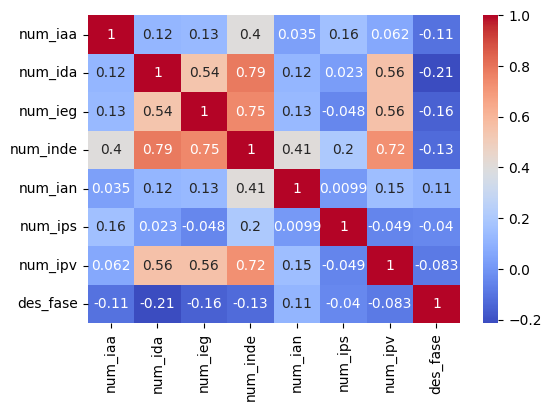

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['num_iaa','num_ida','num_ieg','num_inde','num_ian','num_ips','num_ipv','des_fase']].corr(method='pearson'), annot=True, cmap='coolwarm')

# Preprocessing

In [ ]:
label_encoder = LabelEncoder()
df["nam_pedra"] = label_encoder.fit_transform(df["nam_pedra"])

# Separar X e y antes do oversampling
colunas_numericas = ["num_ida", "num_ieg", "num_ian", "des_fase"]
X = df[colunas_numericas]
y = df["nam_pedra"]

# Aplicar oversampling antes da normalização
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Criar DataFrame atualizado após oversampling
df_resampled = pd.DataFrame(X_resampled, columns=colunas_numericas)
df_resampled["nam_pedra"] = y_resampled

# Exibir as primeiras linhas do novo dataset balanceado
print(df_resampled.head())


   num_ida  num_ieg  num_ian  des_fase  nam_pedra
0      4.0      4.1      5.0       7.0          1
1      6.8      5.2     10.0       7.0          0
2      5.6      7.9     10.0       7.0          3
3      5.0      4.5     10.0       7.0          1
4      5.2      8.6     10.0       7.0          0


# Ajustando a distribuicao entre as classes

In [ ]:
df.groupby('nam_pedra').count()

,idt_ra,des_fase,des_turma,num_idade,num_inde,num_iaa,num_ian,num_ieg,num_ips,num_ida,des_indicado,des_atingiu_pv,num_ipv,nam_fase_ideal,num_defasagem,num_ano
nam_pedra,,,,,,,,,,,,,,,,
0,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,348,348,1120,1120,1120,1120
1,316,316,316,316,316,316,316,316,316,316,132,132,316,316,316,316
2,688,688,688,688,688,688,688,688,688,688,130,130,688,688,688,688
3,721,721,721,721,721,721,721,721,721,721,250,250,721,721,721,721


In [ ]:
X = df[['num_ida', 'num_ieg', 'num_ian','des_fase']]
y = df['nam_pedra']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=['num_ida', 'num_ieg', 'num_ian','des_fase'])
df_resampled['nam_pedra'] = y_resampled

df_resampled

,num_ida,num_ieg,num_ian,des_fase,nam_pedra
0,4.0,4.1,5.0,7.0,1
1,6.8,5.2,10.0,7.0,0
2,5.6,7.9,10.0,7.0,3
3,5.0,4.5,10.0,7.0,1
4,5.2,8.6,10.0,7.0,0
...,...,...,...,...,...
4475,5.7,5.1,5.0,3.0,3
4476,5.2,6.7,5.0,5.0,3
4477,4.3,7.1,10.0,6.0,3
4478,6.3,8.1,5.0,3.0,3


# Treinando os Modelos

In [ ]:
# Aplicar normalização (agora após o oversampling)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Dividir os dados normalizados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos de treino e teste
print(f"📊 X_train: {X_train.shape}, X_test: {X_test.shape}")

📊 X_train: (3584, 4), X_test: (896, 4)


In [ ]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazer predição no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcular e exibir a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracia)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8370535714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       227
           1       0.94      0.96      0.95       226
           2       0.81      0.88      0.84       208
           3       0.82      0.83      0.83       235

    accuracy                           0.84       896
   macro avg       0.83      0.84      0.83       896
weighted avg       0.83      0.84      0.83       896



In [ ]:
new_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

new_model.fit(X_train, y_train)

y_pred_new = new_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("Classification Report:\n", classification_report(y_test, y_pred_new))

Accuracy: 0.7700892857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       227
           1       0.88      0.81      0.85       226
           2       0.82      0.85      0.83       208
           3       0.72      0.73      0.72       235

    accuracy                           0.77       896
   macro avg       0.77      0.77      0.77       896
weighted avg       0.77      0.77      0.77       896



In [ ]:
# Criar e treinar o modelo de Regressão Logística
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train, y_train)

# Fazer predição no conjunto de teste
y_pred_lr = modelo_lr.predict(X_test)

# Calcular e exibir a acurácia
acuracia_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", acuracia_lr)
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy (Logistic Regression): 0.7488839285714286

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       227
           1       0.82      0.76      0.79       226
           2       0.82      0.86      0.84       208
           3       0.65      0.67      0.66       235

    accuracy                           0.75       896
   macro avg       0.75      0.75      0.75       896
weighted avg       0.75      0.75      0.75       896



In [ ]:
import joblib

#  Salvar o melhor modelo (Random Forest)
joblib.dump(modelo, "modelo_1.pkl")

#  Salvar o StandardScaler ajustado para normalizar os dados no Streamlit
joblib.dump(scaler, "scaler.pkl")

#  Salvar o LabelEncoder ajustado para converter os rótulos no Streamlit
joblib.dump(label_encoder, "label_encoder.pkl")

#  Salvar a acurácia do modelo para exibição no Streamlit
joblib.dump(acuracia, "acuracia.pkl")

print("✅ Arquivos salvos com sucesso!")

✅ Arquivos salvos com sucesso!


In [ ]:
print(dict(enumerate(label_encoder.classes_)))

{0: 'Ametista', 1: 'Quartzo', 2: 'Topázio', 3: 'Ágata'}
